In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
#Over Sampling and under sampling libraries
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore");

Train and Val set

In [2]:
df = pd.read_csv('datasets/train.csv')
df['label'] = df['label'].astype(int)

In [3]:
df

,transaction_id,day,time,amount,card,feature0,feature1,feature2,feature3,feature4,...,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,label
0,0,1,00:00:03,2996.00,5580269,-422.837425,760.707943,58.275207,153.303414,7.202936,...,-0.140629,0.178008,-0.006310,-0.021356,-0.009839,-0.009304,0.000031,-0.021152,-0.000013,0
1,1,1,00:00:06,28.00,2317934,-394.596676,-372.770445,-15.286916,-76.575438,104.952037,...,1.560081,-0.172821,-0.032460,-0.397619,0.025821,-0.094427,-0.009676,-0.000693,0.000025,0
2,2,1,00:00:06,125.78,2447567,-437.242768,-327.536604,146.471711,7.189410,-118.581570,...,-0.276188,-0.304188,-0.761782,-0.024227,0.149462,-0.128246,-0.005386,-0.001266,-0.000331,0
3,3,1,00:00:08,1.20,1803964,-329.477487,-317.287401,-609.106664,-100.007393,-111.556155,...,1.075226,-0.679411,0.029796,0.957184,0.404513,0.020177,-0.007533,-0.022051,-0.000316,0
4,4,1,00:00:56,31.05,3487959,-439.454769,-360.694265,388.431870,41.495894,122.630552,...,0.554647,-0.802328,0.170290,-0.048390,-0.029278,-0.178744,-0.018492,-0.022543,-0.000003,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593091,2338213,20,23:13:24,34.90,2982979,9457.161439,672.448452,95.111019,-291.289051,-9.894481,...,1.552135,0.578813,-0.082312,0.010247,0.131628,0.038943,-0.004550,0.048141,0.000067,0
1593092,2338214,20,23:14:35,60.40,2157248,-441.008438,639.200537,311.526723,-249.521636,-11.657303,...,0.309864,0.517899,-0.013770,0.019830,0.103752,-0.021146,-0.002228,0.001442,-0.000023,0
1593093,2338215,20,23:16:19,23.30,3945491,-436.169606,646.253188,146.985152,-259.263824,-13.901599,...,-0.239709,0.533735,0.006483,0.020180,0.095437,0.000299,-0.002369,0.001129,-0.000031,0
1593094,2338216,20,23:49:03,5.20,1532964,-422.636754,650.769844,42.350745,-265.491708,-15.335591,...,0.347368,0.534015,-0.008933,0.023246,0.102755,-0.000100,-0.004815,0.001087,-0.000017,0


In [4]:
df = df.drop(columns=['day','transaction_id','card','amount','feature2','feature3','feature7','feature10','feature17','feature19','feature21','feature23'])

In [5]:
df['time'] = pd.to_timedelta(df['time']).dt.total_seconds()

In [6]:
df

,time,feature0,feature1,feature4,feature5,feature6,feature8,feature9,feature11,feature12,feature13,feature14,feature15,feature16,feature18,feature20,feature22,label
0,3.0,-422.837425,760.707943,7.202936,-10.915132,-3.458406,2.441702,1.370284,0.282731,0.056079,0.513652,-0.471602,-0.140629,0.178008,-0.021356,-0.009304,-0.021152,0
1,6.0,-394.596676,-372.770445,104.952037,-37.735253,-12.194233,6.927474,-0.547133,-0.346499,1.250504,-0.219448,0.778082,1.560081,-0.172821,-0.397619,-0.094427,-0.000693,0
2,6.0,-437.242768,-327.536604,-118.581570,8.324652,-3.434593,9.293879,17.778668,0.063813,-0.078189,0.017686,-0.548022,-0.276188,-0.304188,-0.024227,-0.128246,-0.001266,0
3,8.0,-329.477487,-317.287401,-111.556155,-60.209254,-3.297218,6.158783,-2.122761,-0.770122,-0.481241,-0.077101,-0.053544,1.075226,-0.679411,0.957184,0.020177,-0.022051,0
4,56.0,-439.454769,-360.694265,122.630552,-87.962271,-15.032204,-9.432846,1.225569,-1.041522,-1.858349,0.203502,0.293755,0.554647,-0.802328,-0.048390,-0.178744,-0.022543,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593091,83604.0,9457.161439,672.448452,-9.894481,76.746030,6.531892,-5.395322,-0.727164,-2.054538,-0.915060,2.420714,0.914444,1.552135,0.578813,0.010247,0.038943,0.048141,0
1593092,83675.0,-441.008438,639.200537,-11.657303,68.884666,5.231016,-5.143300,-0.574023,-2.274011,-0.897177,2.606040,-0.751633,0.309864,0.517899,0.019830,-0.021146,0.001442,0
1593093,83779.0,-436.169606,646.253188,-13.901599,70.526210,5.524197,-4.806638,-0.529420,-2.235967,-0.899177,2.629513,-1.485556,-0.239709,0.533735,0.020180,0.000299,0.001129,0
1593094,85743.0,-422.636754,650.769844,-15.335591,71.545871,5.678248,-4.759558,-0.505333,-2.221825,-0.882586,2.547808,-0.659200,0.347368,0.534015,0.023246,-0.000100,0.001087,0


Test set

In [7]:
df2 = pd.read_csv('datasets/test.csv')
df2['label'] = df2['label'].astype(int)
df2 = df2.drop(columns=['day','transaction_id','card','amount','feature2','feature3','feature7','feature10','feature17','feature19','feature21','feature23'])
df2['time'] = pd.to_timedelta(df2['time']).dt.total_seconds()

In [8]:
x_test = df2.drop(columns='label')
y_test = df2['label']

In [9]:
scaler = preprocessing.StandardScaler().fit(x_test)
X_test = scaler.transform(x_test)
X_test = pd.DataFrame(x_test)

<AxesSubplot:>

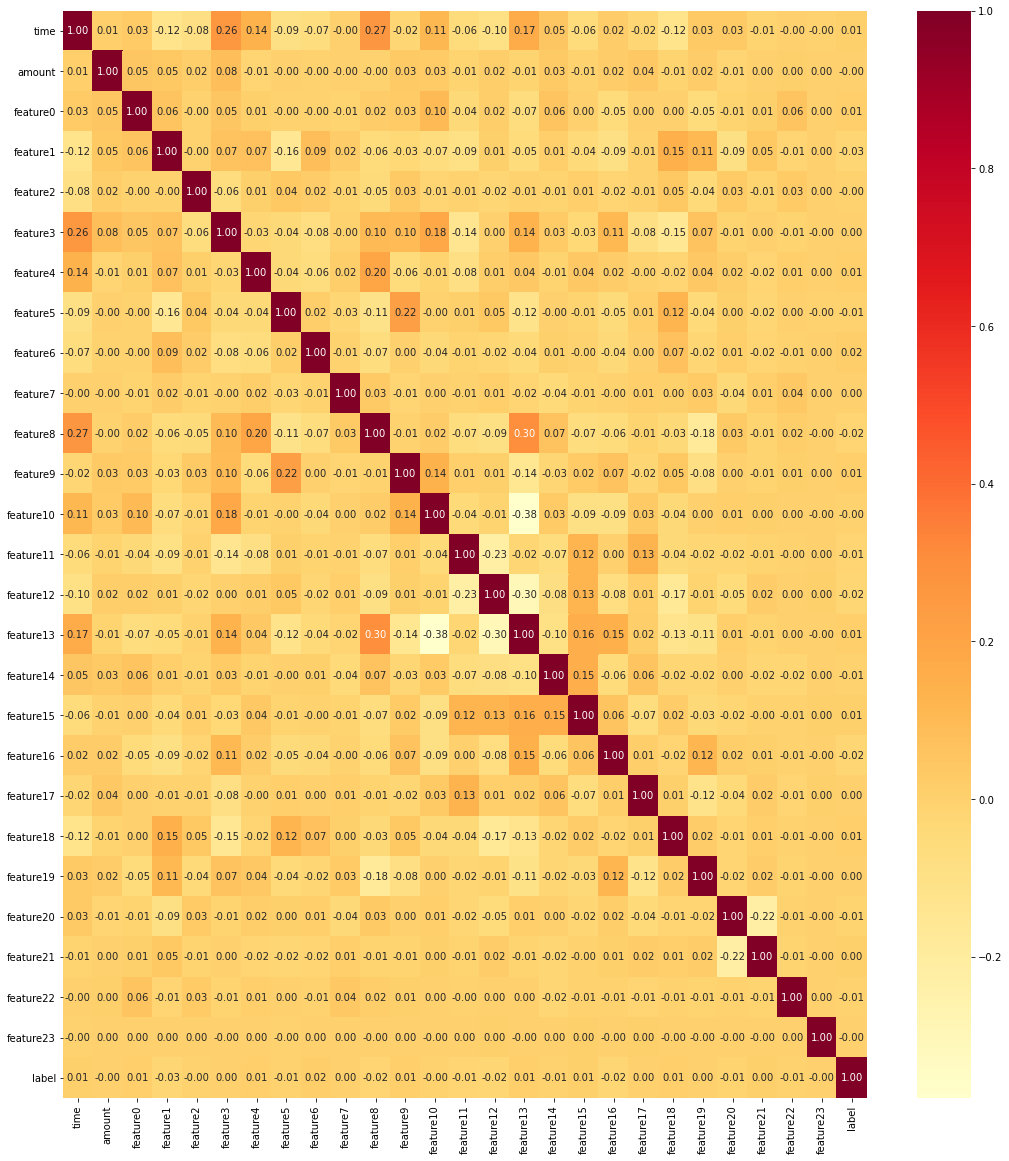

In [11]:
corr = df.corr().index
plt.figure(figsize=(18,20))
sns.heatmap(df[corr].corr(),annot=True,cmap='YlOrRd',fmt='.2f')

In [10]:
X = df.drop('label',axis=1)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
y = df['label']

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [ ]:
for key, classifier in classifiers.items():
    
    #Splitting the data into 5 parts using cv=5 parameter of cross_val_score method
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, 
          "Has a training score of", round(training_score.mean() * 100, 2) , "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.93 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 99.93 % accuracy score


In [17]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# logistic regression best parameters.
log_reg = grid_log_reg.best_estimator_

#--------------------------

# KNeighborsClassifier
knears_params = {"n_neighbors": list(range(2,5,1))}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

#--------------------------

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(probability=True), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

#--------------------------

# DecisionTree Classifier
tree_params = {"max_depth": list(range(2,4,1)), "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

print("Classifers with their tuned parameters we got via GridSearchCV")
print(log_reg)
print(knears_neighbors)
print(svc)
print(tree_clf)

Classifers with their tuned parameters we got via GridSearchCV
LogisticRegression(C=10)
KNeighborsClassifier(n_neighbors=3)
SVC(C=0.9, kernel='linear', probability=True)
DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)


In [18]:
tuned_classifiers = {
    "LogisiticRegression": log_reg,
    "Knears Neighbors": knears_neighbors,
    "Support Vector Classifier": svc,
    "DecisionTreeClassifier": tree_clf
}

for key, classifier in tuned_classifiers.items():
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key} Cross Validation Score: {round(score.mean() * 100, 2)}%')

LogisiticRegression Cross Validation Score: 98.27%
Knears Neighbors Cross Validation Score: 93.92%
Support Vector Classifier Cross Validation Score: 97.06%
DecisionTreeClassifier Cross Validation Score: 98.74%


In [21]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

In [22]:
pred_1 = grid_svc.predict(X_test)

In [23]:
CM_1 = confusion_matrix(y_test,pred_1)
CM_1

array([[220385, 582287],
       [   131,    519]], dtype=int64)

In [24]:
pred_1_prob = grid_svc.predict_proba(X_test)

In [28]:
threshold = 0.99

In [29]:
pred_with_thresh_1 = (pred_1_prob[:,1]>=threshold).astype('int')

In [30]:
CM_1 = confusion_matrix(y_test,pred_with_thresh_1)
CM_1

array([[254360, 548312],
       [   141,    509]], dtype=int64)

In [34]:
print(classification_report(y_test,pred_with_thresh_1))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48    802672
           1       0.00      0.78      0.00       650

    accuracy                           0.32    803322
   macro avg       0.50      0.55      0.24    803322
weighted avg       1.00      0.32      0.48    803322



In [31]:
TN = CM_1[0,0]
FP = CM_1[0,1]
FN = CM_1[1,0]
TP = CM_1[1,1]

In [32]:
DR = TP / (TP + FN)
DR

0.7830769230769231

In [33]:
FPR = FP / TP
FPR

1077.2337917485265

In [1]:
df["label"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Genuine"])
plt.show()

NameError: name 'df' is not defined